In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Read in csv medical data
mdf= pd.read_csv('/Users/robertpatton/Desktop/Desktop - Robert’s MacBook Pro/D208 /medical_clean.csv')

In [3]:
#Examine data info
mdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [4]:
#Look for duplicate values
mdf.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [5]:
#Look for missing values
mdf.isnull().sum()

CaseOrder             0
Customer_id           0
Interaction           0
UID                   0
City                  0
State                 0
County                0
Zip                   0
Lat                   0
Lng                   0
Population            0
Area                  0
TimeZone              0
Job                   0
Children              0
Age                   0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days          0
TotalCharge           0
Additional_charg

In [6]:
#Drop irrelevant variables 
mdf=mdf.drop(['CaseOrder','Customer_id','Interaction','UID','City','State','County','Zip','Population', 'Area', 'TimeZone', 'Job','Gender','Marital','ReAdmis','Full_meals_eaten','Soft_drink','Complication_risk','Services','TotalCharge','Additional_charges','Item1','Item2','Item3','Item4','Item5','Item6','Item7','Item8'], axis=1)

In [7]:
#Confirm variables were dropped
mdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Lat                 10000 non-null  float64
 1   Lng                 10000 non-null  float64
 2   Children            10000 non-null  int64  
 3   Age                 10000 non-null  int64  
 4   Income              10000 non-null  float64
 5   VitD_levels         10000 non-null  float64
 6   Doc_visits          10000 non-null  int64  
 7   vitD_supp           10000 non-null  int64  
 8   Initial_admin       10000 non-null  object 
 9   HighBlood           10000 non-null  object 
 10  Stroke              10000 non-null  object 
 11  Overweight          10000 non-null  object 
 12  Arthritis           10000 non-null  object 
 13  Diabetes            10000 non-null  object 
 14  Hyperlipidemia      10000 non-null  object 
 15  BackPain            10000 non-null  object 
 16  Anxie

In [8]:
#Get value counts for categorical variables
mdf.Initial_admin.value_counts()

Emergency Admission      5060
Elective Admission       2504
Observation Admission    2436
Name: Initial_admin, dtype: int64

In [9]:
#Counts for HighBlood
mdf.HighBlood.value_counts()

No     5910
Yes    4090
Name: HighBlood, dtype: int64

In [10]:
#Counts for Stroke
mdf.Stroke.value_counts()

No     8007
Yes    1993
Name: Stroke, dtype: int64

In [11]:
#Counts for Overweight
mdf.Overweight.value_counts()

Yes    7094
No     2906
Name: Overweight, dtype: int64

In [12]:
#Counts for Arthritis
mdf.Arthritis.value_counts()

No     6426
Yes    3574
Name: Arthritis, dtype: int64

In [13]:
#Counts for Diabetes
mdf.Diabetes.value_counts()

No     7262
Yes    2738
Name: Diabetes, dtype: int64

In [14]:
#Counts for Hyperlipidemia
mdf.Hyperlipidemia.value_counts()

No     6628
Yes    3372
Name: Hyperlipidemia, dtype: int64

In [15]:
#Counts for BackPain
mdf.BackPain.value_counts()

No     5886
Yes    4114
Name: BackPain, dtype: int64

In [16]:
#Counts for Anxiety
mdf.Anxiety.value_counts()

No     6785
Yes    3215
Name: Anxiety, dtype: int64

In [17]:
#Counts for Allergic_rhinitis
mdf.Allergic_rhinitis.value_counts()

No     6059
Yes    3941
Name: Allergic_rhinitis, dtype: int64

In [18]:
#Counts for Reflux_esophagitis
mdf.Reflux_esophagitis.value_counts()

No     5865
Yes    4135
Name: Reflux_esophagitis, dtype: int64

In [19]:
#Counts for Asthma
mdf.Asthma.value_counts()

No     7107
Yes    2893
Name: Asthma, dtype: int64

In [20]:
#Examine variable data
mdf.head()

,Lat,Lng,Children,Age,Income,VitD_levels,Doc_visits,vitD_supp,Initial_admin,HighBlood,...,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Initial_days
0,34.34960,-86.72508,1,53,86575.93,19.141466,6,0,Emergency Admission,Yes,...,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,10.585770
1,30.84513,-85.22907,3,51,46805.99,18.940352,4,1,Emergency Admission,Yes,...,Yes,No,No,No,No,No,No,Yes,No,15.129562
2,43.54321,-96.63772,3,53,14370.14,18.057507,4,0,Elective Admission,Yes,...,Yes,No,Yes,No,No,No,No,No,No,4.772177
3,43.89744,-93.51479,0,78,39741.49,16.576858,4,0,Elective Admission,No,...,No,Yes,No,No,No,No,No,Yes,Yes,1.714879
4,37.59894,-76.88958,1,22,1209.56,17.439069,5,2,Elective Admission,No,...,No,No,No,Yes,No,No,Yes,No,No,1.254807


In [21]:
#Create a list of binary columns
Binary_columns= ['HighBlood', 'Stroke', 'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma']

In [22]:
#Replace binary columns yes/no with 0/1
mdf[Binary_columns]=mdf[Binary_columns].replace({'Yes': 1, 'No': 0})

In [23]:
#Confirm replace function successful
print(mdf)

           Lat        Lng  Children  Age    Income  VitD_levels  Doc_visits  \
0     34.34960  -86.72508         1   53  86575.93    19.141466           6   
1     30.84513  -85.22907         3   51  46805.99    18.940352           4   
2     43.54321  -96.63772         3   53  14370.14    18.057507           4   
3     43.89744  -93.51479         0   78  39741.49    16.576858           4   
4     37.59894  -76.88958         1   22   1209.56    17.439069           5   
...        ...        ...       ...  ...       ...          ...         ...   
9995  36.42886  -78.23716         2   25  45967.61    16.980860           4   
9996  39.43609  -74.87302         4   87  14983.02    18.177020           5   
9997  36.36655  -87.29988         3   45  65917.81    17.129070           4   
9998  44.10354 -102.01590         3   43  29702.32    19.910430           5   
9999  40.49998  -80.19959         8   70  62682.63    18.388620           5   

      vitD_supp          Initial_admin  HighBlood  

In [24]:
#Move Income variable to first position
first_column=mdf.pop('Income')
mdf.insert(0, 'Income', first_column)
display(mdf)

,Income,Lat,Lng,Children,Age,VitD_levels,Doc_visits,vitD_supp,Initial_admin,HighBlood,...,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Initial_days
0,86575.93,34.34960,-86.72508,1,53,19.141466,6,0,Emergency Admission,1,...,0,1,1,0,1,1,1,0,1,10.585770
1,46805.99,30.84513,-85.22907,3,51,18.940352,4,1,Emergency Admission,1,...,1,0,0,0,0,0,0,1,0,15.129562
2,14370.14,43.54321,-96.63772,3,53,18.057507,4,0,Elective Admission,1,...,1,0,1,0,0,0,0,0,0,4.772177
3,39741.49,43.89744,-93.51479,0,78,16.576858,4,0,Elective Admission,0,...,0,1,0,0,0,0,0,1,1,1.714879
4,1209.56,37.59894,-76.88958,1,22,17.439069,5,2,Elective Admission,0,...,0,0,0,1,0,0,1,0,0,1.254807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,45967.61,36.42886,-78.23716,2,25,16.980860,4,1,Emergency Admission,1,...,0,0,0,0,0,1,0,1,0,51.561220
9996,14983.02,39.43609,-74.87302,4,87,18.177020,5,0,Elective Admission,1,...,1,1,1,0,0,0,0,0,1,68.668240
9997,65917.81,36.36655,-87.29988,3,45,17.129070,4,0,Elective Admission,1,...,1,0,0,0,0,1,1,0,0,70.154180
9998,29702.32,44.10354,-102.01590,3,43,19.910430,5,1,Emergency Admission,0,...,1,0,0,0,1,0,0,0,0,63.356900


In [25]:
#Re-express Initial_admin column to numerical values and use one-hot encoding
mdf=pd.get_dummies(mdf, columns=['Initial_admin'], prefix='Initial_admin', drop_first=True)
mdf.head()

,Income,Lat,Lng,Children,Age,VitD_levels,Doc_visits,vitD_supp,HighBlood,Stroke,...,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Initial_days,Initial_admin_Emergency Admission,Initial_admin_Observation Admission
0,86575.93,34.34960,-86.72508,1,53,19.141466,6,0,1,0,...,1,0,1,1,1,0,1,10.585770,1,0
1,46805.99,30.84513,-85.22907,3,51,18.940352,4,1,1,0,...,0,0,0,0,0,1,0,15.129562,1,0
2,14370.14,43.54321,-96.63772,3,53,18.057507,4,0,1,0,...,1,0,0,0,0,0,0,4.772177,0,0
3,39741.49,43.89744,-93.51479,0,78,16.576858,4,0,0,1,...,0,0,0,0,0,1,1,1.714879,0,0
4,1209.56,37.59894,-76.88958,1,22,17.439069,5,2,0,0,...,0,1,0,0,1,0,0,1.254807,0,0


In [26]:
#Confirm all variables are numeric values
print(mdf)

        Income       Lat        Lng  Children  Age  VitD_levels  Doc_visits  \
0     86575.93  34.34960  -86.72508         1   53    19.141466           6   
1     46805.99  30.84513  -85.22907         3   51    18.940352           4   
2     14370.14  43.54321  -96.63772         3   53    18.057507           4   
3     39741.49  43.89744  -93.51479         0   78    16.576858           4   
4      1209.56  37.59894  -76.88958         1   22    17.439069           5   
...        ...       ...        ...       ...  ...          ...         ...   
9995  45967.61  36.42886  -78.23716         2   25    16.980860           4   
9996  14983.02  39.43609  -74.87302         4   87    18.177020           5   
9997  65917.81  36.36655  -87.29988         3   45    17.129070           4   
9998  29702.32  44.10354 -102.01590         3   43    19.910430           5   
9999  62682.63  40.49998  -80.19959         8   70    18.388620           5   

      vitD_supp  HighBlood  Stroke  ...  Diabetes  

In [27]:
#Get summary statistics
print(mdf.describe())

              Income           Lat           Lng      Children           Age  \
count   10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean    40490.495160     38.751099    -91.243080      2.097200     53.511700   
std     28521.153293      5.403085     15.205998      2.163659     20.638538   
min       154.080000     17.967190   -174.209700      0.000000     18.000000   
25%     19598.775000     35.255120    -97.352982      0.000000     36.000000   
50%     33768.420000     39.419355    -88.397230      1.000000     53.000000   
75%     54296.402500     42.044175    -80.438050      3.000000     71.000000   
max    207249.100000     70.560990    -65.290170     10.000000     89.000000   

        VitD_levels    Doc_visits     vitD_supp     HighBlood        Stroke  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean      17.964262      5.012200      0.398900      0.409000      0.199300   
std        2.017231      1.045734      0.6

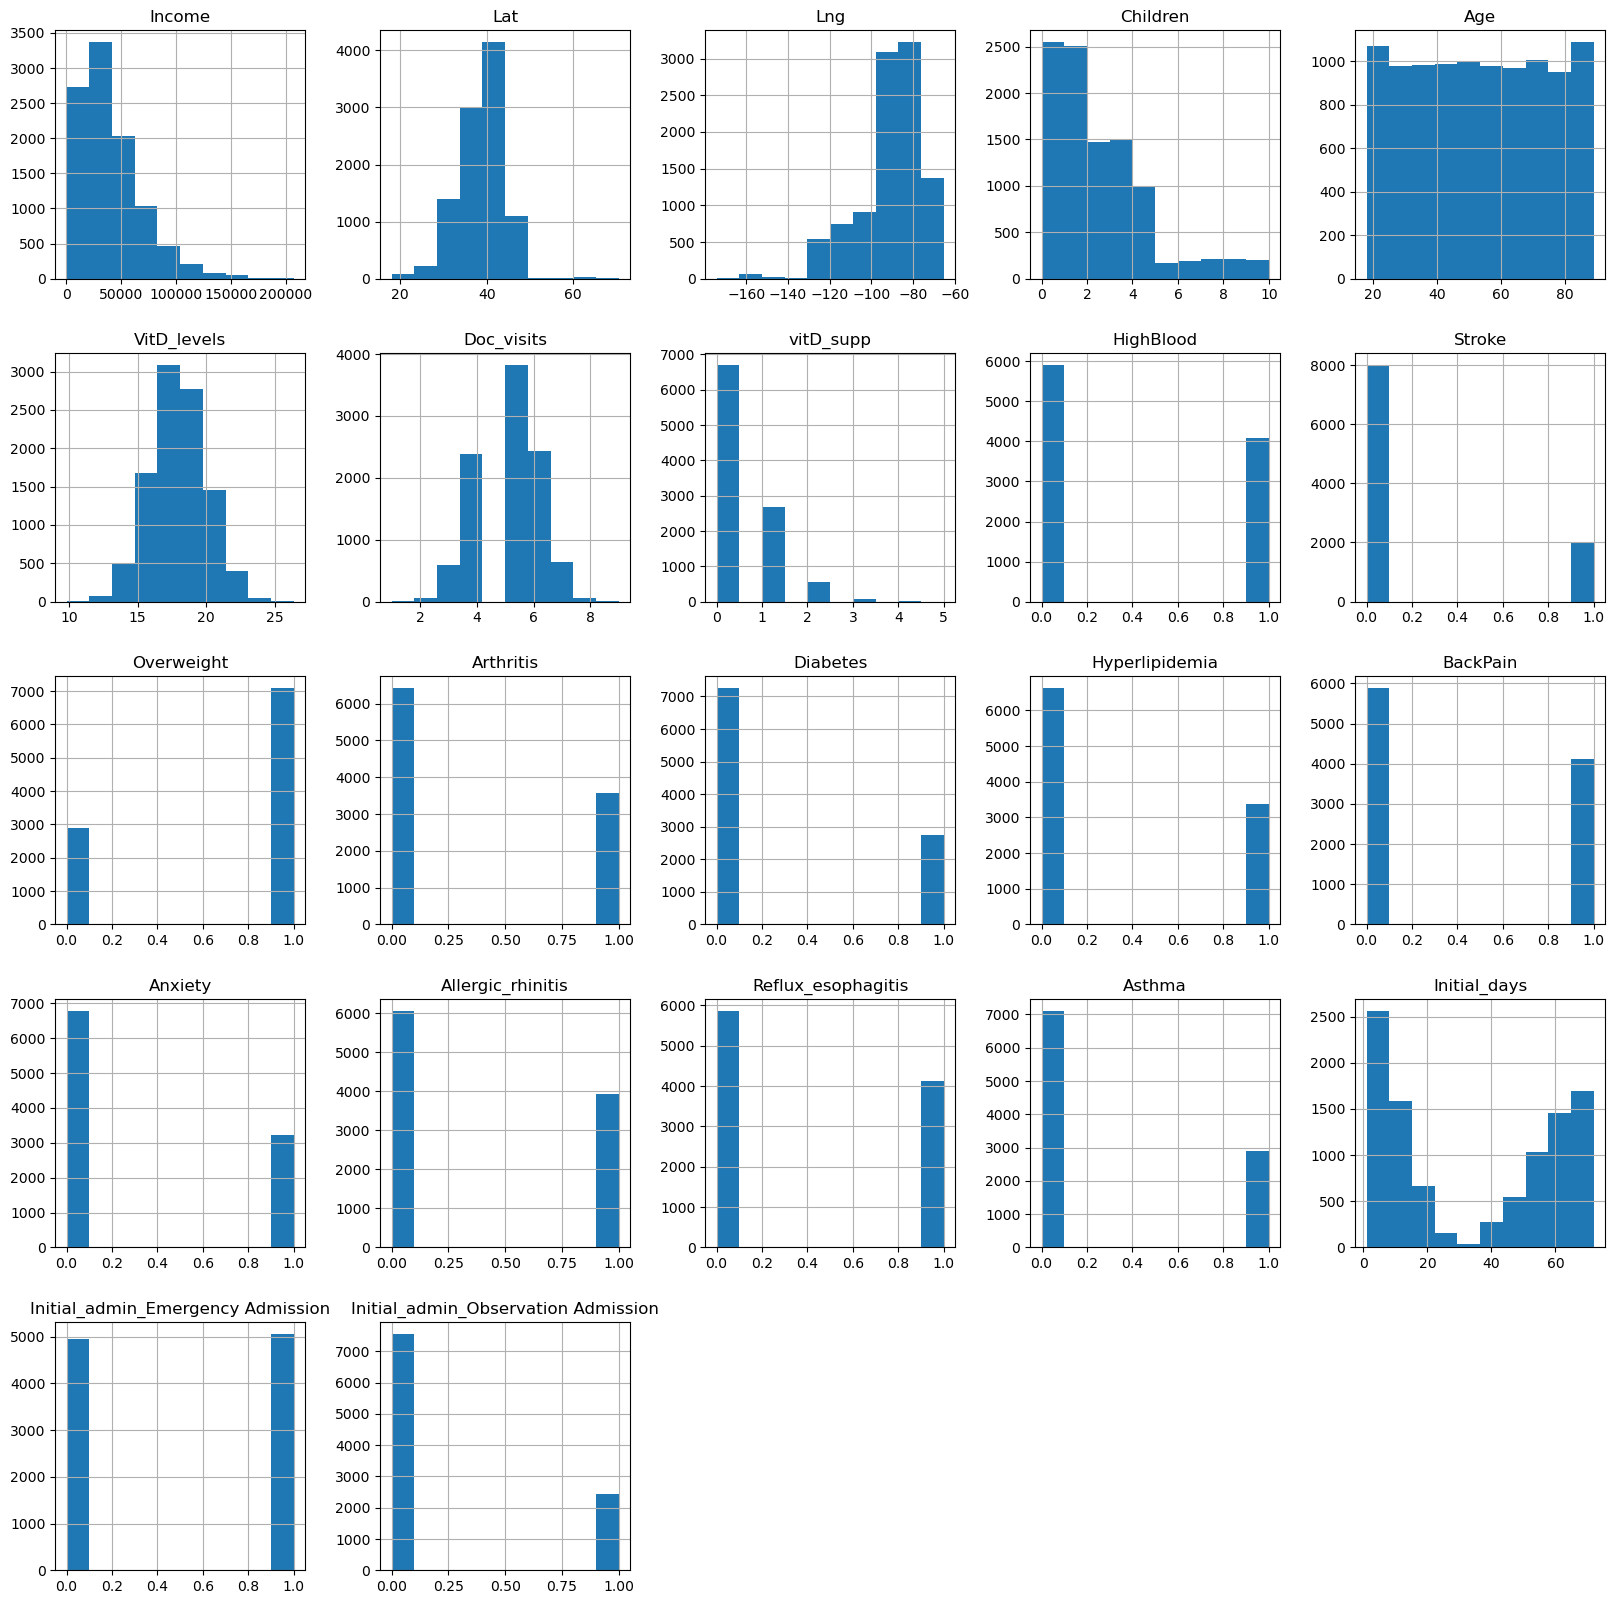

In [28]:
#Examine univariate distribution of variables
mdf.hist(figsize=(20,20))
plt.show()

In [29]:
#Gather numerical values for input into a boxplot
mdf_num_data=mdf.select_dtypes(include=[np.number])
mdf_num_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Income                               10000 non-null  float64
 1   Lat                                  10000 non-null  float64
 2   Lng                                  10000 non-null  float64
 3   Children                             10000 non-null  int64  
 4   Age                                  10000 non-null  int64  
 5   VitD_levels                          10000 non-null  float64
 6   Doc_visits                           10000 non-null  int64  
 7   vitD_supp                            10000 non-null  int64  
 8   HighBlood                            10000 non-null  int64  
 9   Stroke                               10000 non-null  int64  
 10  Overweight                           10000 non-null  int64  
 11  Arthritis                    

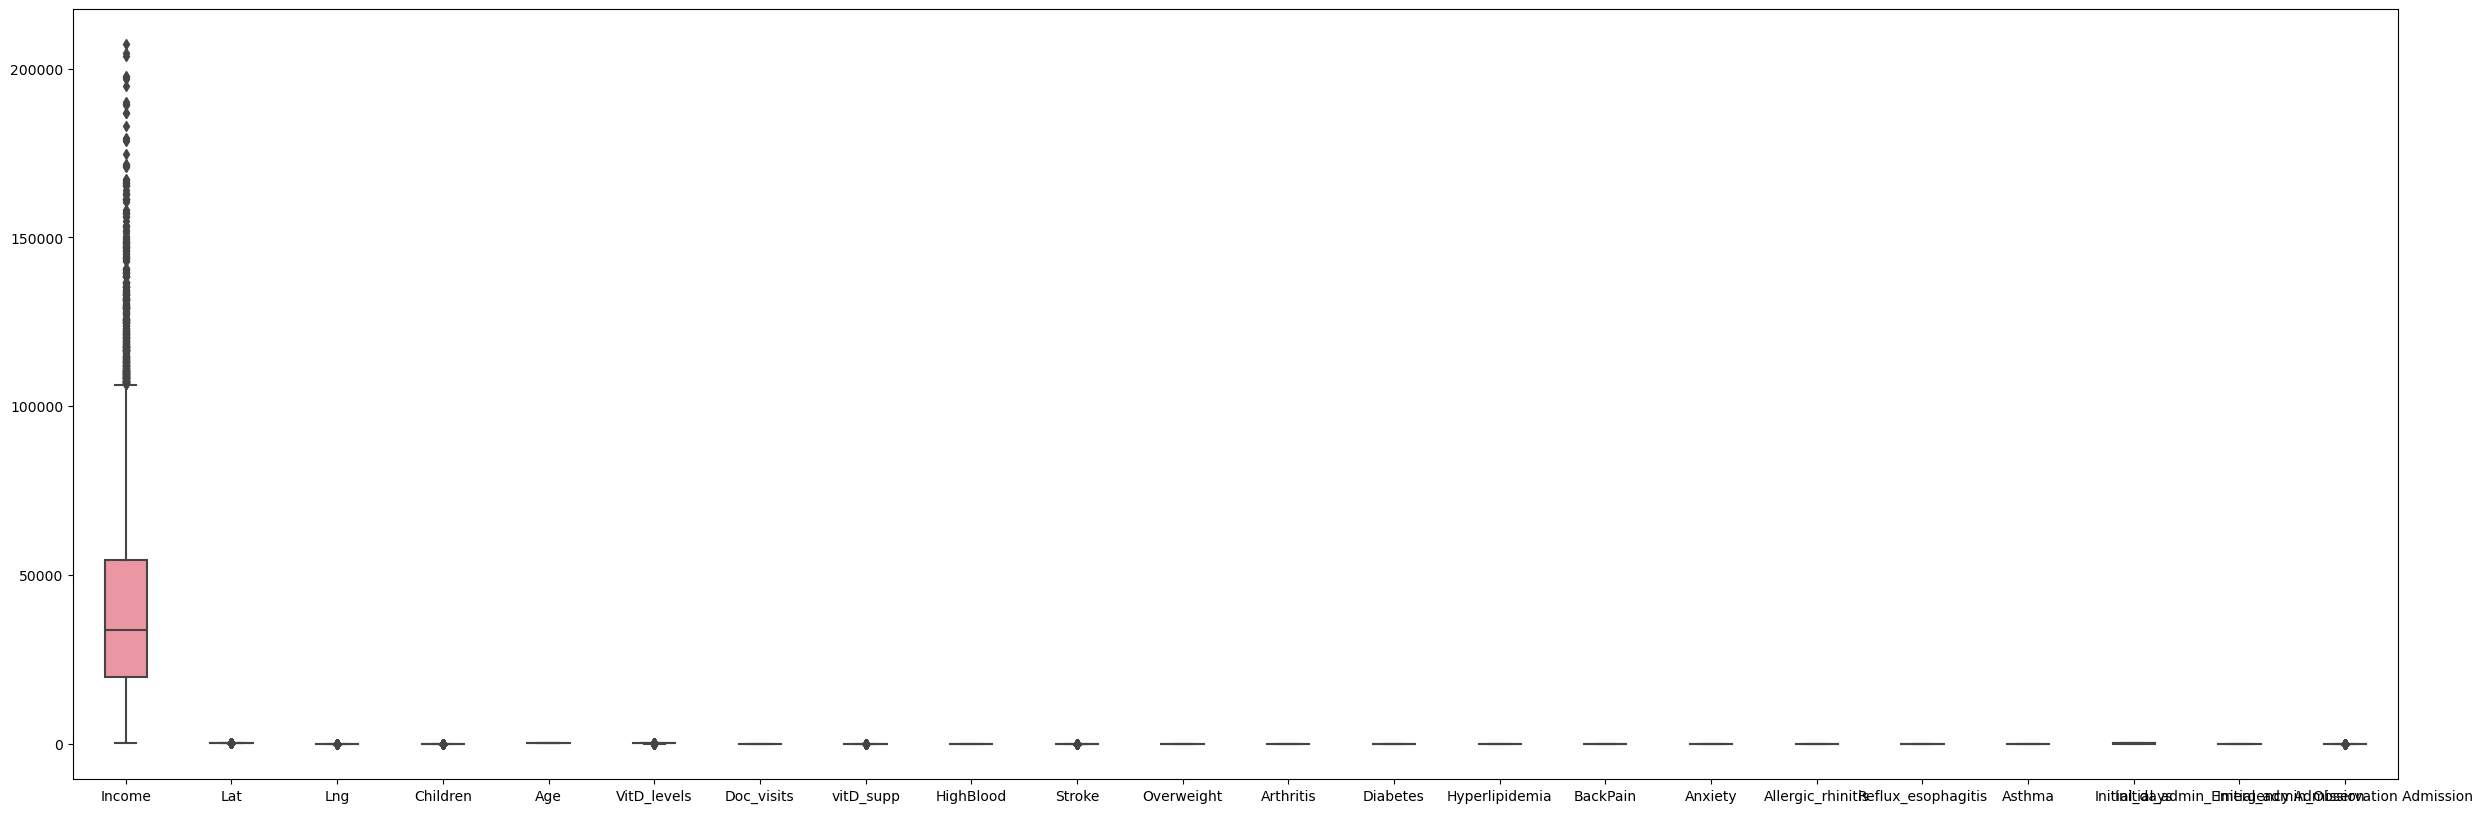

In [30]:
#use boxplot to find outliers in numerical data types
plt.subplots(figsize=(30,10))
boxplot=sns.boxplot(data=mdf_num_data, width=0.4)

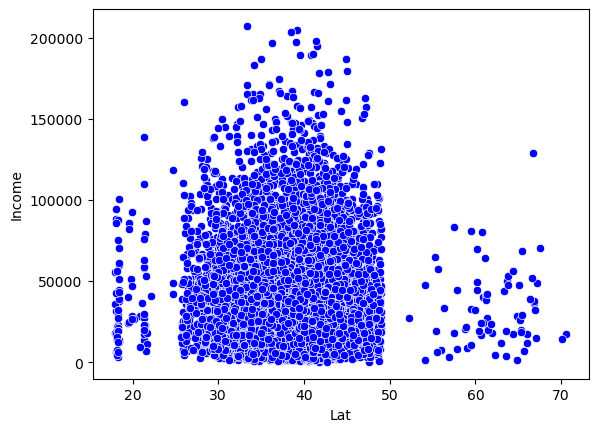

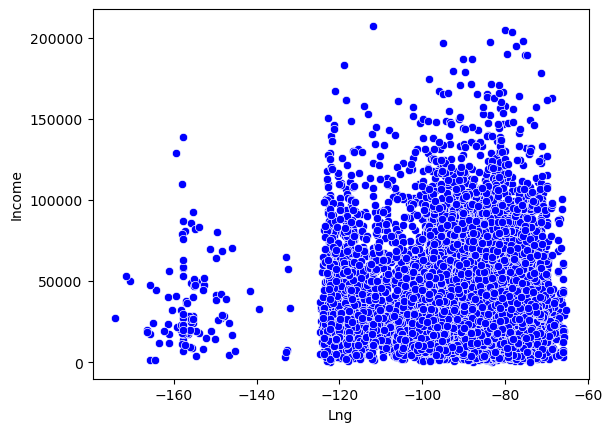

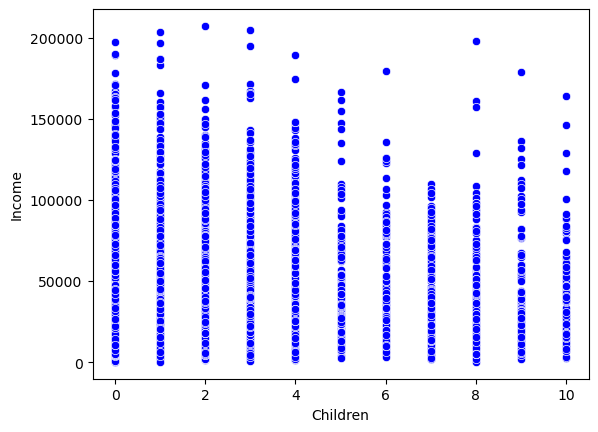

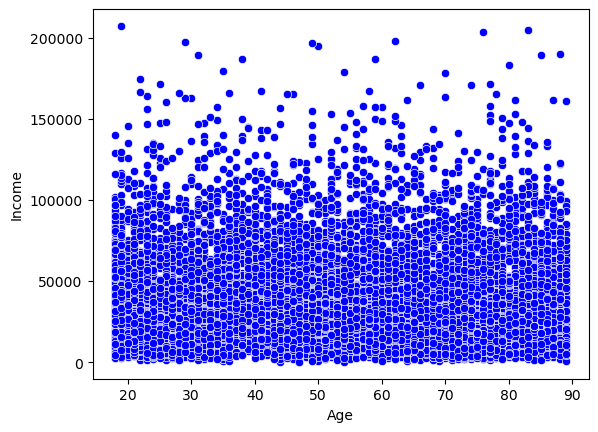

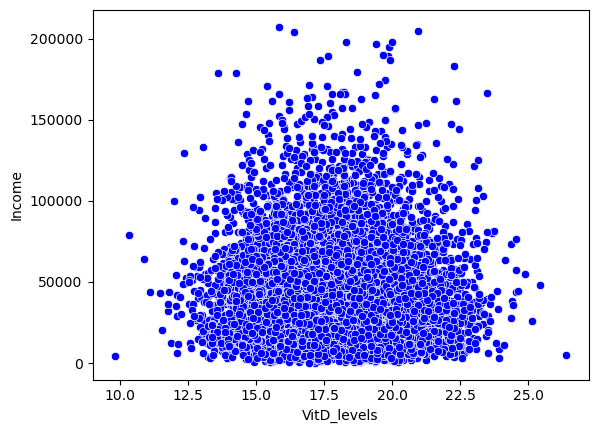

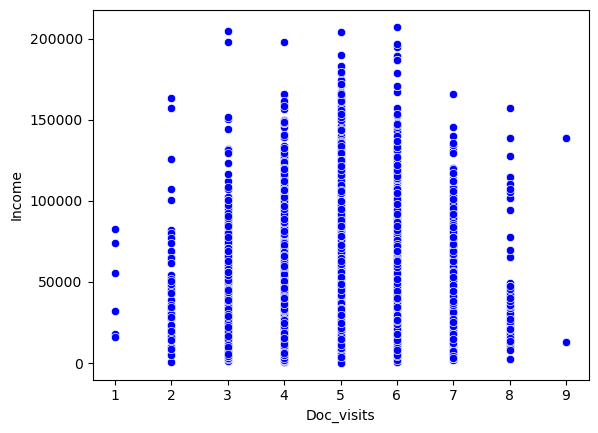

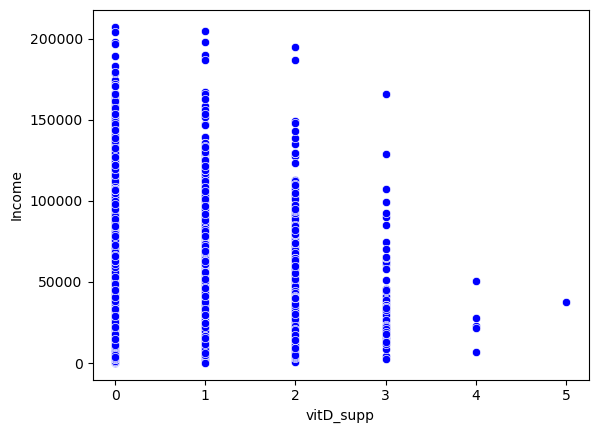

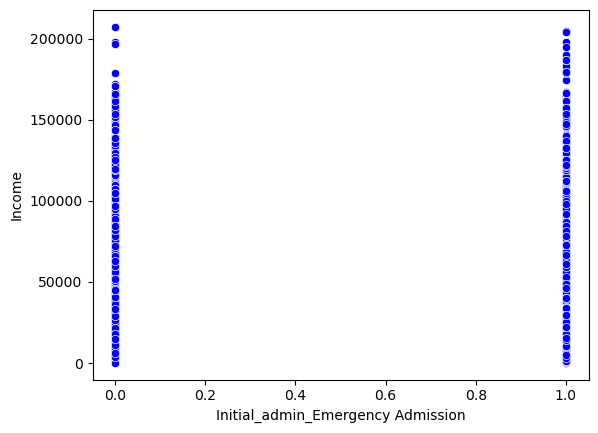

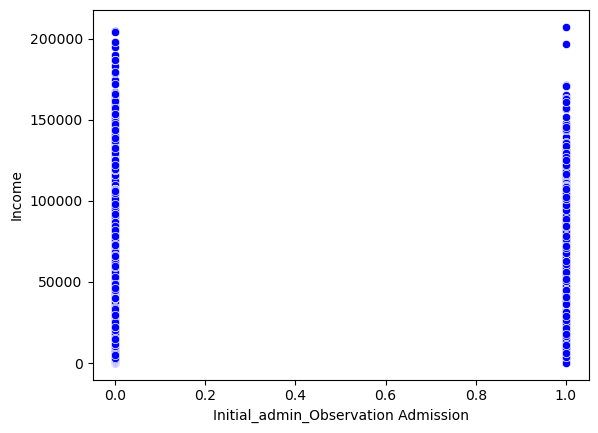

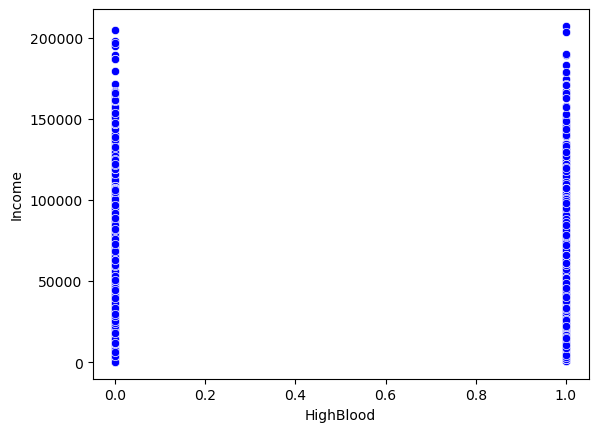

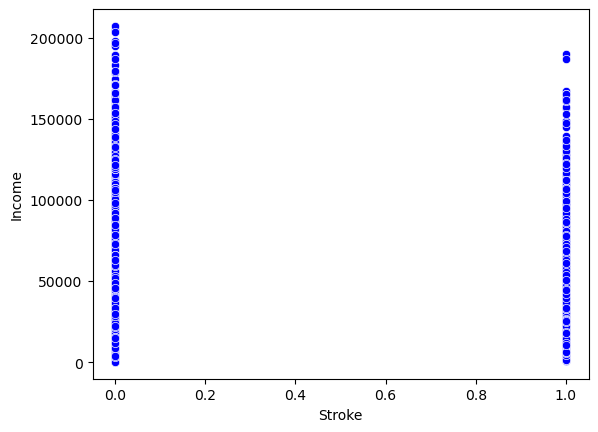

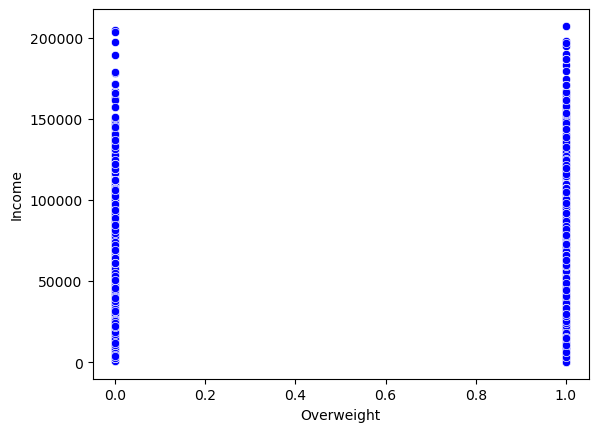

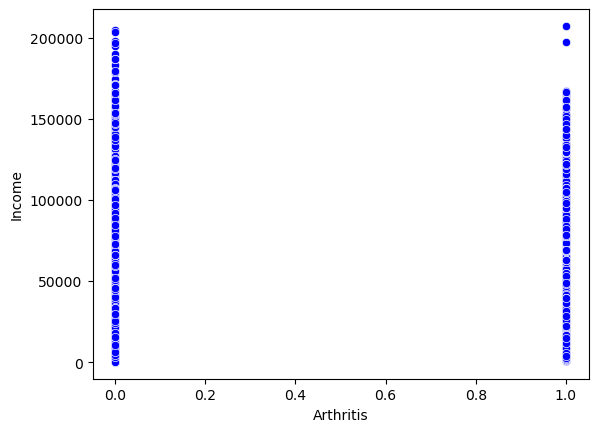

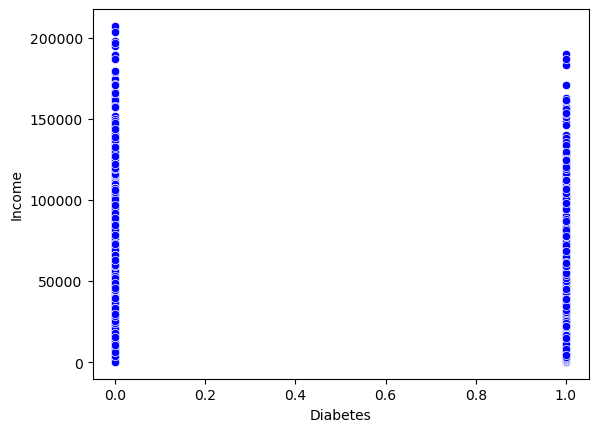

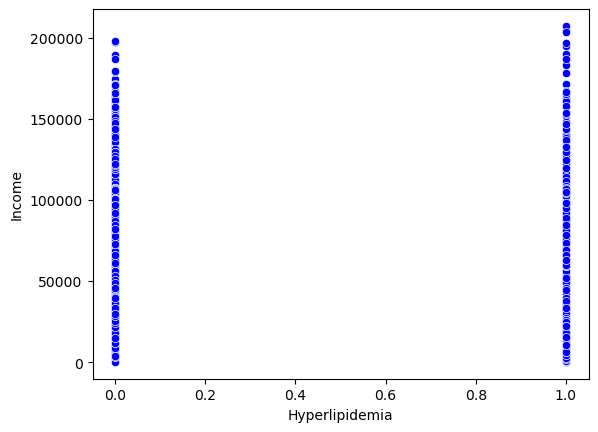

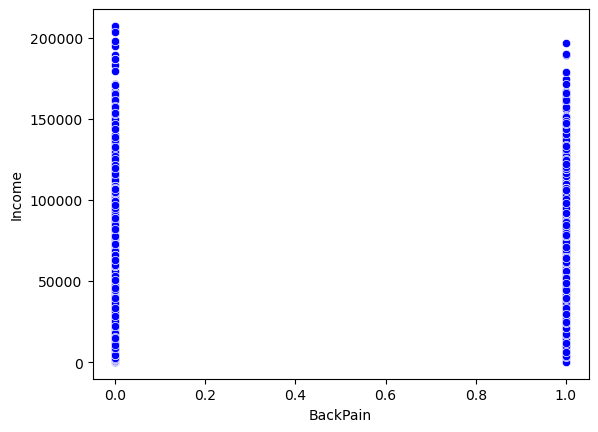

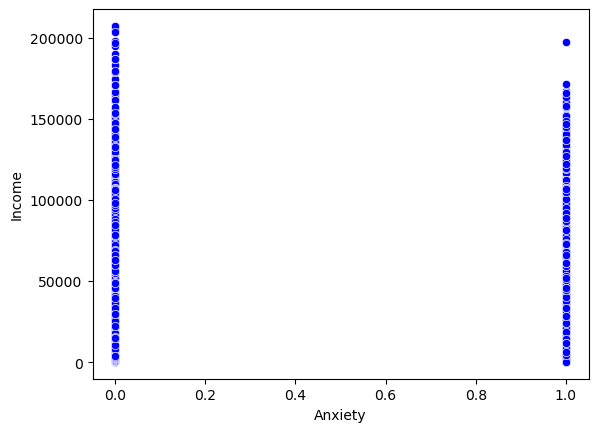

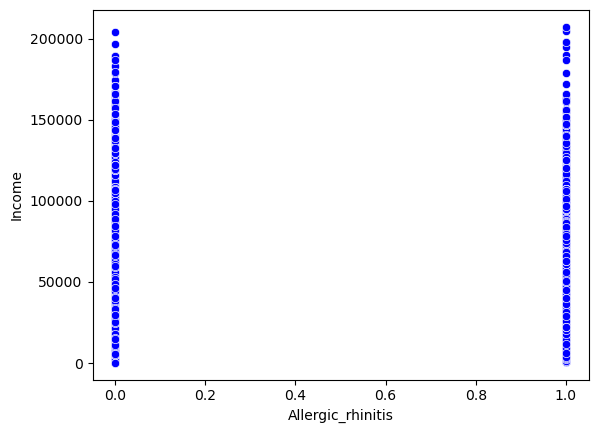

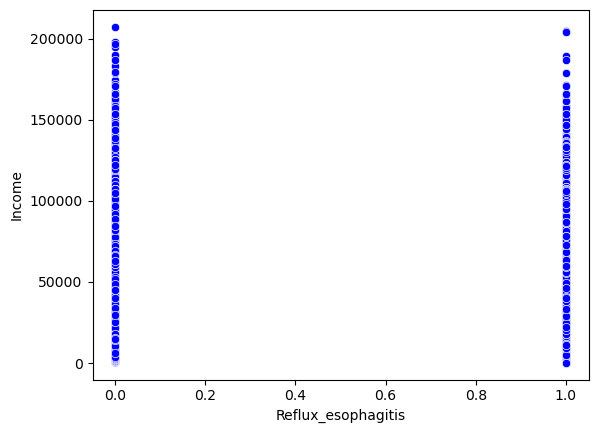

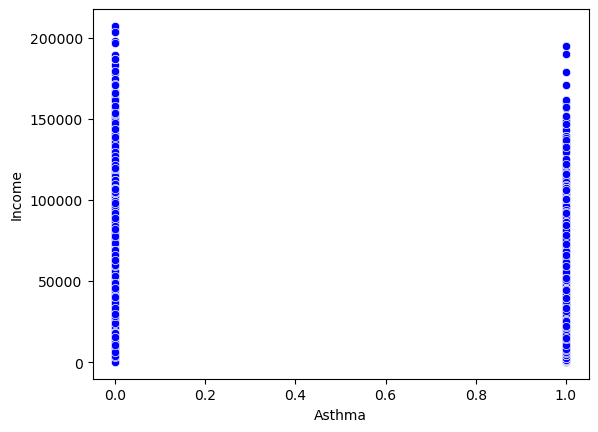

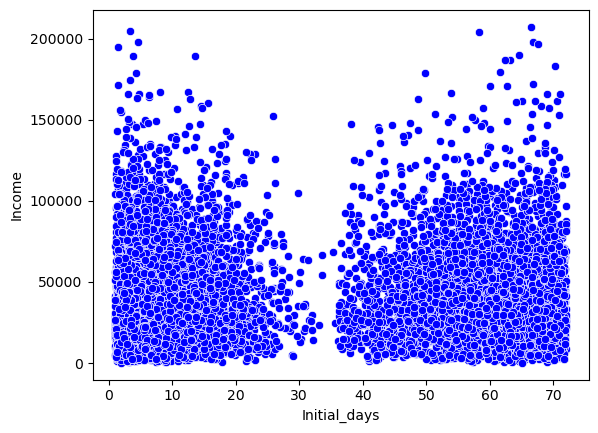

In [31]:
#Create scatterplots to show bivariate relationship between predictor and independent variables
sns.scatterplot(x=mdf['Lat'], y=mdf['Income'], color='Blue')
plt.show();
sns.scatterplot(x=mdf['Lng'], y=mdf['Income'], color='Blue')
plt.show();
sns.scatterplot(x=mdf['Children'], y=mdf['Income'], color='Blue')
plt.show();
sns.scatterplot(x=mdf['Age'], y=mdf['Income'], color='Blue')
plt.show();
sns.scatterplot(x=mdf['VitD_levels'], y=mdf['Income'], color='Blue')
plt.show();
sns.scatterplot(x=mdf['Doc_visits'], y=mdf['Income'], color='Blue')
plt.show();
sns.scatterplot(x=mdf['vitD_supp'], y=mdf['Income'], color='Blue')
plt.show();
sns.scatterplot(x=mdf['Initial_admin_Emergency Admission'], y=mdf['Income'], color='Blue')
plt.show();
sns.scatterplot(x=mdf['Initial_admin_Observation Admission'], y=mdf['Income'], color='Blue')
plt.show();
sns.scatterplot(x=mdf['HighBlood'], y=mdf['Income'], color='Blue')
plt.show();
sns.scatterplot(x=mdf['Stroke'],y=mdf['Income'], color='Blue')
plt.show();
sns.scatterplot(x=mdf['Overweight'], y=mdf['Income'], color='Blue')
plt.show();
sns.scatterplot(x=mdf['Arthritis'], y=mdf['Income'], color='Blue')
plt.show();
sns.scatterplot(x=mdf['Diabetes'], y=mdf['Income'], color='Blue')
plt.show();
sns.scatterplot(x=mdf['Hyperlipidemia'], y=mdf['Income'], color='Blue')
plt.show();
sns.scatterplot(x=mdf['BackPain'], y=mdf['Income'], color='Blue')
plt.show();
sns.scatterplot(x=mdf['Anxiety'], y=mdf['Income'], color='Blue')
plt.show();
sns.scatterplot(x=mdf['Allergic_rhinitis'], y=mdf['Income'], color='Blue')
plt.show();
sns.scatterplot(x=mdf['Reflux_esophagitis'], y=mdf['Income'], color='Blue')
plt.show();
sns.scatterplot(x=mdf['Asthma'], y=mdf['Income'], color='Blue')
plt.show();
sns.scatterplot(x=mdf['Initial_days'], y=mdf['Income'], color='Blue')
plt.show();

In [33]:
mdf.to_csv(r'/Users/robertpatton/Desktop/D208_clean.csv')